In [1]:
import pickle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn


In [2]:
# load data dict from kaggle

data_dict = pd.read_excel('dataset/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1)
data_dict = data_dict.drop(data_dict.columns[[0, 1]], axis=1)
data_dict

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
# load data from kaggle

df = pd.read_excel('dataset/E Commerce Dataset.xlsx', sheet_name='E Comm', header=0)
df = df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
        'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
        'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
        'CashbackAmount', 'Churn'
    ]]

df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,6.0,3,Laptop & Accessory,2,Single,9,1,5.0,159.93,1
1,NaN,8.0,4,Mobile,3,Single,7,1,0.0,120.90,1
2,NaN,30.0,4,Mobile,3,Single,6,1,3.0,120.28,1
3,0.0,15.0,4,Laptop & Accessory,5,Single,8,0,3.0,134.07,1
4,0.0,12.0,3,Mobile,5,Single,3,0,3.0,129.60,1
...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,2,Laptop & Accessory,1,Married,6,0,4.0,150.71,0
5626,13.0,13.0,5,Fashion,5,Married,6,0,NaN,224.91,0
5627,1.0,11.0,2,Laptop & Accessory,4,Married,3,1,4.0,186.42,0
5628,23.0,9.0,5,Laptop & Accessory,4,Married,4,0,9.0,178.90,0


In [4]:
# load date from capstone assignment

df_assignment = pd.read_csv('dataset/data_ecommerce_customer_churn.csv')

In [5]:
# get non-duplicate rows

merged = pd.merge(df, df_assignment, how='outer', indicator=True)

non_duplicates = merged[merged['_merge'] != 'both']

non_duplicates = non_duplicates.drop(columns=['_merge'])
non_duplicates.drop_duplicates(inplace=True)
non_duplicates

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2,0.0,6.0,3,Fashion,5,Divorced,2,0,7.0,174.12,0
3,0.0,6.0,3,Fashion,5,Married,2,0,7.0,174.12,0
4,0.0,6.0,3,Laptop & Accessory,3,Divorced,1,0,2.0,148.98,0
7,0.0,6.0,3,Laptop & Accessory,3,Married,2,0,7.0,152.96,0
14,0.0,6.0,3,Mobile,1,Single,2,1,8.0,126.86,1
...,...,...,...,...,...,...,...,...,...,...,...
7179,NaN,30.0,3,Mobile,4,Single,2,0,4.0,121.77,0
7192,NaN,32.0,4,Mobile,3,Married,2,0,0.0,120.29,0
7194,NaN,32.0,4,Mobile,3,Married,2,0,0.0,120.29,0
7195,NaN,33.0,3,Mobile,4,Single,3,0,2.0,123.11,0


In [6]:
# define X and y test

X_test = non_duplicates.drop('Churn', axis = 1)
y_test = non_duplicates['Churn']

In [7]:
# define evaluation metric

from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, precision_recall_fscore_support

def get_evaluation_metric(y_true, y_pred):
    f2_scores = fbeta_score(y_true, y_pred, beta=2, average=None)
    precision, recall, _, support = precision_recall_fscore_support(y_true, y_pred)
    f2_score_avg = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    
    precision_avg = round((precision * support).sum() / support.sum(), 2)
    recall_avg = round((recall * support).sum() / support.sum(), 2)
    support_avg = int(support.sum())

    f2_scores_rounded = [round(score, 2) for score in f2_scores]
    precision_rounded = [round(prec, 2) for prec in precision]
    recall_rounded = [round(rec, 2) for rec in recall]
    support_rounded = [int(sup) for sup in support]
    
    scores_list = list(zip(precision_rounded, recall_rounded, f2_scores_rounded, support_rounded)) + [
        (precision_avg, recall_avg, round(f2_score_avg, 2), support_avg)]
    
    df_scores = pd.DataFrame(scores_list, columns=['precision', 'recall', 'f2 score', 'support'], 
        index=[0, 1, 'weighted avg'])
    
    return df_scores


In [8]:
# load model
import pickle

filename = "models/best_model.sav"
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(get_evaluation_metric(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1320
           1       0.67      0.69      0.68       259

    accuracy                           0.89      1579
   macro avg       0.80      0.81      0.81      1579
weighted avg       0.89      0.89      0.89      1579

              precision  recall  f2 score  support
0                  0.94    0.93      0.93     1320
1                  0.67    0.69      0.69      259
weighted avg       0.89    0.89      0.89     1579


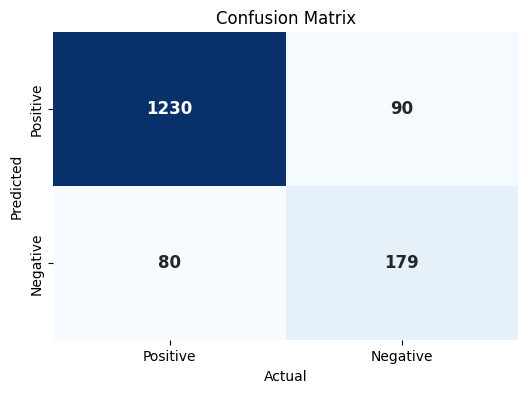

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
